# Autovalores, autovectores, polinomio caracteristico, diagonalización

| Librería | Función | Explicación |
| --- | --- | --- |
| numpy | numpy.linalg.eig | Calcula los autovalores y autovectores derechos de una matriz cuadrada |
| numpy | numpy.linalg.eigh | Calcula los autovalores y autovectores de una matriz hermítica compleja o simétrica real |
| numpy | numpy.poly | Calcula el polinomio característico de una matriz |
| sympy | sympy.Matrix.eigenvals | Calcula los autovalores de una matriz simbólica |
| sympy | sympy.Matrix.eigenvects | Calcula los autovalores y autovectores de una matriz simbólica |
| sympy | sympy.Matrix.charpoly | Calcula el polinomio característico de una matriz simbólica |

#Diagonalizacion
Una matriz cuadrada A es diagonalizable si y solo si cada autovalor  $\lambda$ de multiplicidad $m$ produce exactamente $m$ autovectores básicos; es decir, si y solo si la solución general del sistema $(A - I\lambda) \vec{x} = 0$ tiene exactamente $m$ parámetros.


Para diagonalizar una matriz A, se necesita encontrar una matriz invertible P tal que $P^{-1}AP$ sea una matriz diagonal D. Esto significa que las columnas de P son los autovectores de A y los elementos de la diagonal de D son los autovalores correspondientes de A.

Encuentre la matrix diagnonal para las matrices siguientes.

1. Calcular el polinomio caracteristico, los autovalores y autvectores propios de la siguiente matrices, comprobar con la solucion analitica:

a.
    \begin{bmatrix}
    1 & -1 & 4 \\
    3 & 2 & -1 \\
    2 & 1 & -1\
    \end{bmatrix}



b. Matriz con autovalores imaginarios
    \begin{bmatrix}
    3 & -5 \\
    1 & -1 \\
    \end{bmatrix}


In [63]:
import numpy as np
import sympy as sp
import scipy as sc

In [64]:
def determinante(M, i = 0):
  #M = M.astype(float)
  s = M.shape
  if(s[0] != s[1]):
    print("La matriz enviada debe ser cuadrada")
    return
  if (s[0] == 2):
    return ((M[0,0]*M[1,1]) - (M[0,1]*M[1,0]))
  det = 0.0
  for j in range(0, s[0]):
    det += M[i,j]*determinante(submatriz(M, i, j))
  return det

def submatriz(M, i, j):
  #M = M.astype(float)
  s = M.shape
  if(s[0] != s[1]):
    print("La matriz enviada debe ser cuadrada")
    return
  B = sp.Matrix(np.zeros((s[0]-1, s[0]-1)))
  #B = B.astype(float)
  i_b = 0
  j_b = 0
  for i_ in range(0, s[0]):
    if(i_ == i):
      continue
    for j_ in range(0, s[0]):
      if(j_ == j):
        continue
      B[i_b,j_b] = M[i_,j_]
      j_b += 1
    i_b += 1
    j_b = 0
  return B

In [65]:
lambda_x = sp.Symbol("lambda")
A = np.matrix(np.array([[1,-1,4],[3,2,-1],[2,1,-1]]))
A = sp.Matrix(A)
I = np.identity(3)
I = sp.Matrix(I)

In [66]:
P = determinante(A-I*lambda_x)
P.simplify()
P = sp.poly(P)
P

Poly(-1.0*lambda**3 + 2.0*lambda**2 + 11.0*lambda - 4.0, lambda, domain='RR')

In [67]:

#roots = sp.solve(P,x)
roots = P.nroots()
roots

[-2.67369778260194, 0.345666493106333, 4.32803128949561]

In [68]:
P(1)

8.00000000000000

#Con Librerias de Numpy

numpy.linalg

In [69]:
def get_autoval_autovec_poly(M):
  s = M.shape
  if(s[0]!=s[1]):
    print("La matriz enviada debe ser cuadrada")
    return
  autovalores, P = 	np.linalg.eig(M)
  poly = np.poly(M)
  return autovalores, P, poly

def getDiagonal_autovectores(M, decimals = 5):
  s = M.shape
  if(s[0]!=s[1]):
    print("La matriz enviada debe ser cuadrada")
    return
  #val autovalores de A (valores que irán en la matriz diagonal)
  #P matriz con los autovectores de A
  val, P = 	np.linalg.eig(M)
  P_1 = P.I #P inversa
  D = np.matmul(np.matmul(P_1,M),P)
  D = D.round(decimals=decimals)
  return D, P

Para la matriz

\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & -1\
\end{bmatrix}

In [70]:
A = np.matrix(np.array([[1,-1,4.],[3,2,-1],[2,1,-1]]))
D1 = getDiagonal_autovectores(A)[0]
sp.Matrix(D1)

Matrix([
[3.0,    0,   0],
[  0, -2.0,   0],
[  0,    0, 1.0]])

Matriz con autovalores imaginarios
\begin{bmatrix}
3 & -5 \\
1 & -1 \\
\end{bmatrix}

In [71]:
A = np.matrix(np.array([[3,-5],[1,-1]]))
D2 = getDiagonal_autovectores(A)[0]
sp.Matrix(D2)

Matrix([
[1.0 + 1.0*I,           0],
[          0, 1.0 - 1.0*I]])

Matriz

\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & 1\
\end{bmatrix}

In [72]:
A = np.matrix(np.array([[1,-1,4.],[3,2,-1],[2,1,1]]))
D3 = getDiagonal_autovectores(A)[0]
sp.Matrix(D3)

Matrix([
[4.0,     0,      0],
[  0, 1.0*I,      0],
[  0,     0, -1.0*I]])

#Actividad 2.

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica,

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola









In [104]:
import matplotlib.pyplot as plt

const = 6
x = sp.Symbol("x")
y = sp.Symbol("y")
params=(A,const)

In [111]:
def hiperbola(x, y):
  v = np.array([x,y])
  h = np.array([(A @ v).dot(v)-6])
  return h

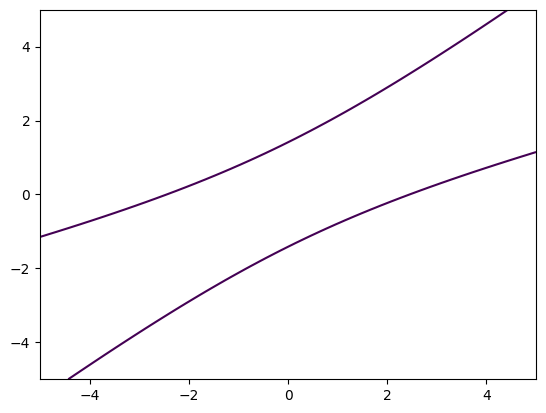

In [112]:
x_ = np.linspace(-5,5,100)
y_ = np.linspace(-5,5,100)

X, Y = np.meshgrid(x_, y_)
hip = np.vectorize(hiperbola)(X,Y)

plt.contour(X,Y, hip,levels=[0])


- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola

In [124]:
A = np.array([[1,-2],[-2,3]])

val, Q = 	np.linalg.eig(A)
Q

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [127]:

v1 = Q[:,0]
v2 = Q[:,1]
ortogonal = v1.T@v2
print(ortogonal)


A = Q@D@Q.T
A
v = np.array((x,y))
u=Q.T@v
print(u)

0.0
[-0.85065080835204*x - 0.525731112119133*y
 0.525731112119133*x - 0.85065080835204*y]


In [128]:
d = (D @ u).dot(u)
d

(-0.85065080835204*x - 0.525731112119133*y)*(0.200813136327666*x + 0.124109343637964*y) + (0.525731112119133*x - 0.85065080835204*y)*(2.2270337921145*x - 3.60341636973583*y)